##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [2]:
voters = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv')
print(voters)

    Jurisdiction  Year Month  New registered voters
0        Arizona  2016   Jan                  25852
1        Arizona  2016   Feb                  51155
2        Arizona  2016   Mar                  48614
3        Arizona  2016   Apr                  30668
4        Arizona  2020   Jan                  33229
..           ...   ...   ...                    ...
101     Virginia  2020   Jan                  25934
102     Virginia  2020   Feb                  29507
103     Virginia  2020   Mar                  31492
104     Virginia  2020   Apr                   5467
105     Virginia  2020   May                   8239

[106 rows x 4 columns]


##Introduction (10 points)
You've been hired to work with a government organization interested information about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



In [ ]:
#1. The purpose of my project is to analyze voter registration trends in the United States to uncover meaningful insights that can inform policy decisions and voter outreach strategies.
#2. The goal is to identify national trends by examining how voter registration has evovled over time across the United States.
#3. It is important for someone to read this notebook because for policymakers understanding voter registration patterns can inform outreach campaigns to target underrepresented groups or improve accessiblity. As for researchers by analyzing this data can reveal social, political, ore economic factors influencing registration trends. For the public this information can encourage civic engagement and awareness.

#Question 1: How have voter registration rates in the United States changed over the past decade ?

#Question 2: In Florida, what is the relationship between voter registr spikes and key political events from 2016 to 2020?

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [3]:
print(voters.head())

  Jurisdiction  Year Month  New registered voters
0      Arizona  2016   Jan                  25852
1      Arizona  2016   Feb                  51155
2      Arizona  2016   Mar                  48614
3      Arizona  2016   Apr                  30668
4      Arizona  2020   Jan                  33229


Check for any missing data data. (1 point)

In [4]:
voters.isnull().values.any()

False

In [5]:
voters.dropna()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


Check your data types. (1 point)

In [6]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [7]:
voters=voters.rename(columns ={"Jurisdiction": "Name", "New registered voters": "registered_voters"})
print(voters)

         Name  Year Month  registered_voters
0     Arizona  2016   Jan              25852
1     Arizona  2016   Feb              51155
2     Arizona  2016   Mar              48614
3     Arizona  2016   Apr              30668
4     Arizona  2020   Jan              33229
..        ...   ...   ...                ...
101  Virginia  2020   Jan              25934
102  Virginia  2020   Feb              29507
103  Virginia  2020   Mar              31492
104  Virginia  2020   Apr               5467
105  Virginia  2020   May               8239

[106 rows x 4 columns]


Explain any potential limitations to your data (2 points)

In [ ]:
#Some potential limiations within the data could include:
#Data collected by different sources may vary in terms of reporting standards or accuracy. Some states may use different methods to count or report voter registration numbers, leading to discrepancies in the dataset. If the data is inconsistent across states or years, it could lead to unreliable trends to comparisons.
#If the data is not represenattive of all voter groups, the analysis may fail to capture the full scope of trends. This could lead to conclusions that only reflect the experiences of specific populations, neglecting important insights from less-represented communities.
#Over time, the way voter registration is collected may change. For example, voter registration forms may have evolved. These changes could introduce bias, making it difficult to compare data across time periods.

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month year, and number of registered voters. (5 points)



In [27]:
highest_registration = voters.loc[voters["registered_voters"].idxmax()]
state = highest_registration["Name"]
month = highest_registration["Month"]
year = highest_registration["Year"]
registered_voters = highest_registration["registered_voters"]
print("Highest New Voter Registration:")
print(f"State: {state}")
print(f"Month: {month}")
print(f"Year: {year}")
print(f"New Registered Voters: {registered_voters}")

Highest New Voter Registration:
State: California
Month: Feb
Year: 2020
New Registered Voters: 238281


What is the average voter registration? (1 points)

In [26]:
voters['registered_voters'].mean()

48223.46226415094

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [10]:
avg_registration = voters['registered_voters'].mean()
high_voters = [voters['registered_voters'] > avg_registration]
num_high_voters = len(high_voters)
print(f"Number of times voter registration was higher than average: {num_high_voters}")

Number of times voter registration was higher than average: 1


How many times did each state go above the national average for new voter registration? (2 points)



In [12]:
voters['above_avg'] = voters['registered_voters'] > avg_registration
state_above_avg_count = voters.groupby('Name')['above_avg'].sum()
print(state_above_avg_count)

Name
Arizona                 3
California              7
Colorado                0
Delaware                0
District of Columbia    0
Florida                 7
Georgia                 1
Illinois                4
Maryland                0
North Carolina          6
Texas                   8
Virginia                0
Name: above_avg, dtype: int64


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [15]:
avg_registration_per_state = voters.groupby('Name')['registered_voters'].mean()
top_three_states = avg_registration_per_state.sort_values(ascending=False).head(3)
print(top_three_states)

Name
California    144545.375
Texas         114610.100
Florida        65868.125
Name: registered_voters, dtype: float64


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

<ipython-input-16-35b788d0928a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(total_voters_per_state, x='registered_voters', y='Name', palette='viridis')


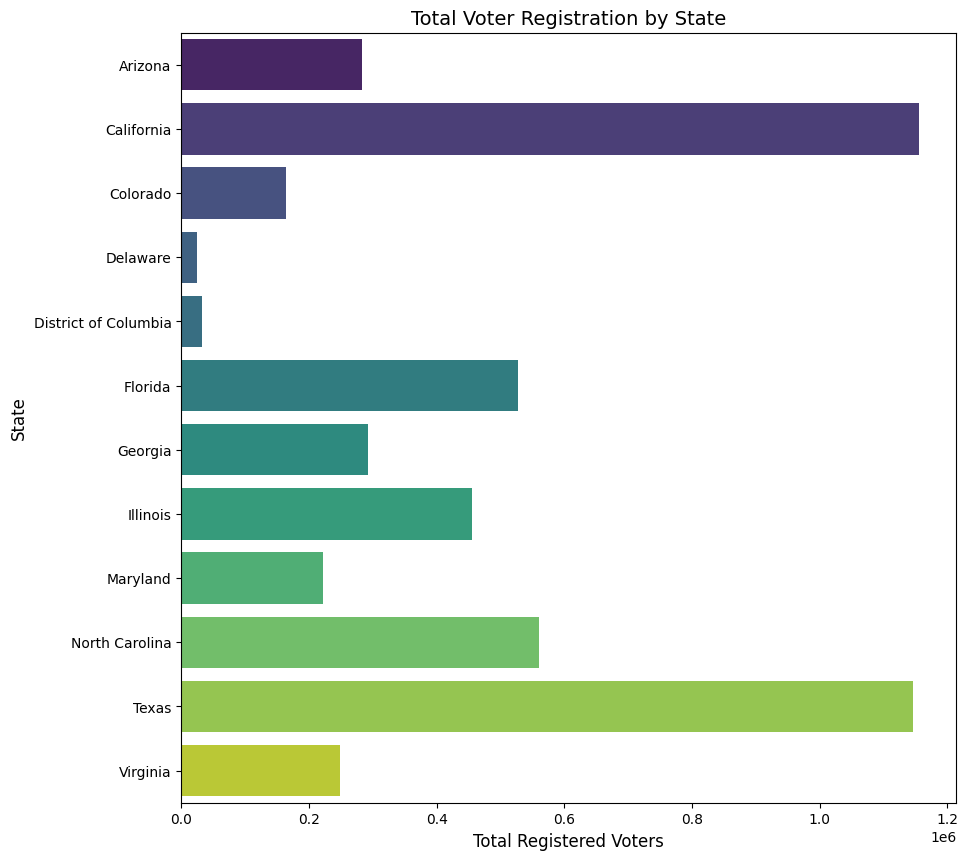

In [16]:
total_voters_per_state = voters.groupby('Name')['registered_voters'].sum().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(total_voters_per_state, x='registered_voters', y='Name', palette='viridis')
plt.xlabel("Total Registered Voters", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.title("Total Voter Registration by State", fontsize=14)
plt.show()
#California and Texas have the same amount of total registerd voters
#Delaware has the least amount of total registered voters
#Florida and North Carolina also have around the same amoutn of total registered voters

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

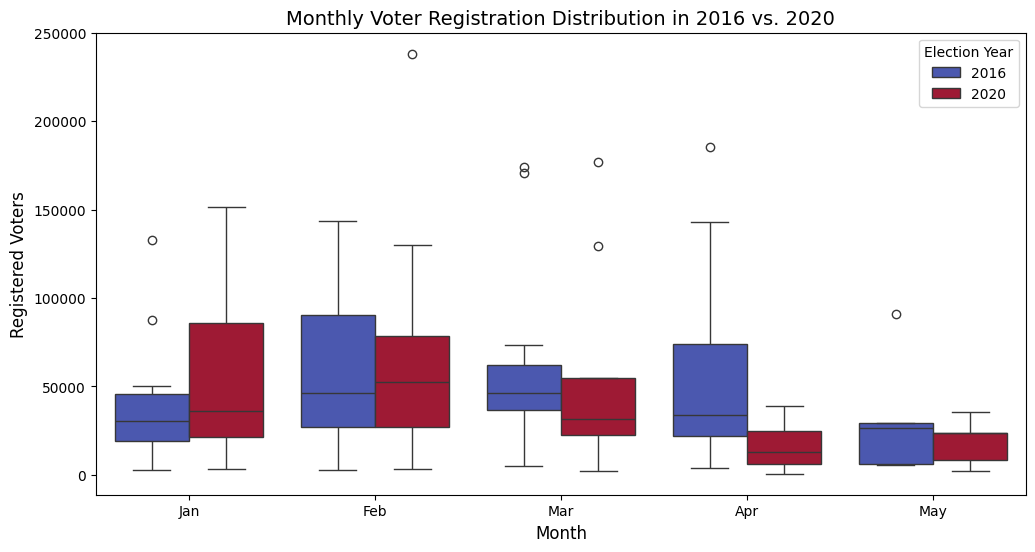

In [17]:
voter_trends = voters.loc[(voters['Year'] == 2016) | (voters['Year'] == 2020)]
plt.figure(figsize=(12, 6))
sns.boxplot(voter_trends, x='Month', y='registered_voters', hue='Year', palette='coolwarm')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Registered Voters", fontsize=12)
plt.title("Monthly Voter Registration Distribution in 2016 vs. 2020", fontsize=14)
plt.legend(title="Election Year")
plt.show()
#Highest registration for both was during January and February compared to the later months (April and May)
#2020 had more extreme outliers particularly in February and March.

Create a data visualization that relates to either your state level research question or your national level research question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

<ipython-input-18-5681fe3a4f49>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=florida_voter_data, x='Year', y='registered_voters', palette='coolwarm')


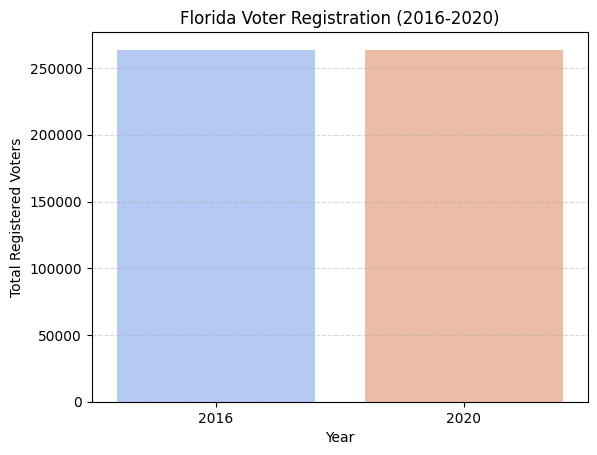

In [18]:
florida_data = voters[(voters['Name'] == 'Florida') & (voters['Year'].between(2016, 2020))]
florida_voter_data = florida_data.groupby('Year')['registered_voters'].sum().reset_index()
sns.barplot(data=florida_voter_data, x='Year', y='registered_voters', palette='coolwarm')
plt.title("Florida Voter Registration (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Total Registered Voters")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [19]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.38 MiB/s, done.
Resolving deltas: 100% (13/13), done.


Set our continental US bounding box to us for the next questions. (2 points)

In [20]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

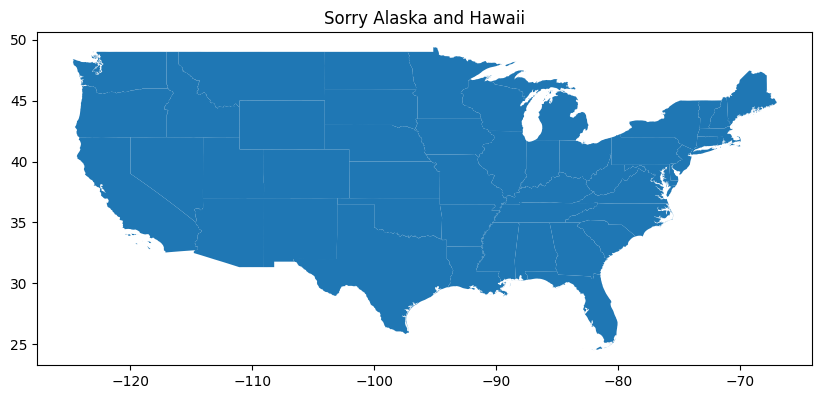

In [21]:
bbox = states.cx[minx:maxx, miny:maxy]
bbox.plot(figsize=(10, 10))
plt.title("Sorry Alaska and Hawaii")
plt.show()

Create a dataframe that shows the average voter registration per state. (2 points)

In [22]:
avg_voter_registration = voters.groupby("Name")["registered_voters"].mean().reset_index()
avg_voter_registration.rename(columns={"registered_voters": "avg_registered_voters"}, inplace=True)
print(avg_voter_registration.head())

                   Name  avg_registered_voters
0               Arizona              35311.500
1            California             144545.375
2              Colorado              20527.500
3              Delaware               3166.375
4  District of Columbia               3248.400


Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

  STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      37  01027616  0400000US37    37     NC  North Carolina   00   
1      51  01779803  0400000US51    51     VA        Virginia   00   
2      12  00294478  0400000US12    12     FL         Florida   00   
3      48  01779801  0400000US48    48     TX           Texas   00   
4      06  01779778  0400000US06    06     CA      California   00   

          ALAND       AWATER  \
0  125923656064  13466071395   
1  102257717110   8528531774   
2  138949136250  31361101223   
3  676653171537  19006305260   
4  403503931312  20463871877   

                                            geometry            Name  \
0  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...  North Carolina   
1  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...        Virginia   
2  MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...         Florida   
3  MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...           Texas   
4  MULTIPOLYGON (((-118.60

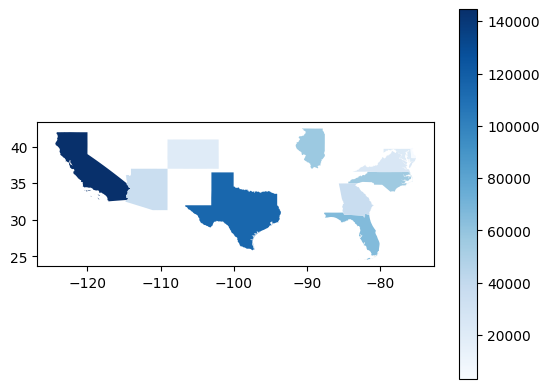

In [28]:
merged_data = states.merge(avg_voter_registration, left_on="NAME", right_on="Name", how="inner")
merged_data.plot(column="avg_registered_voters", cmap="Blues", legend=True)
print(merged_data.head())

Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

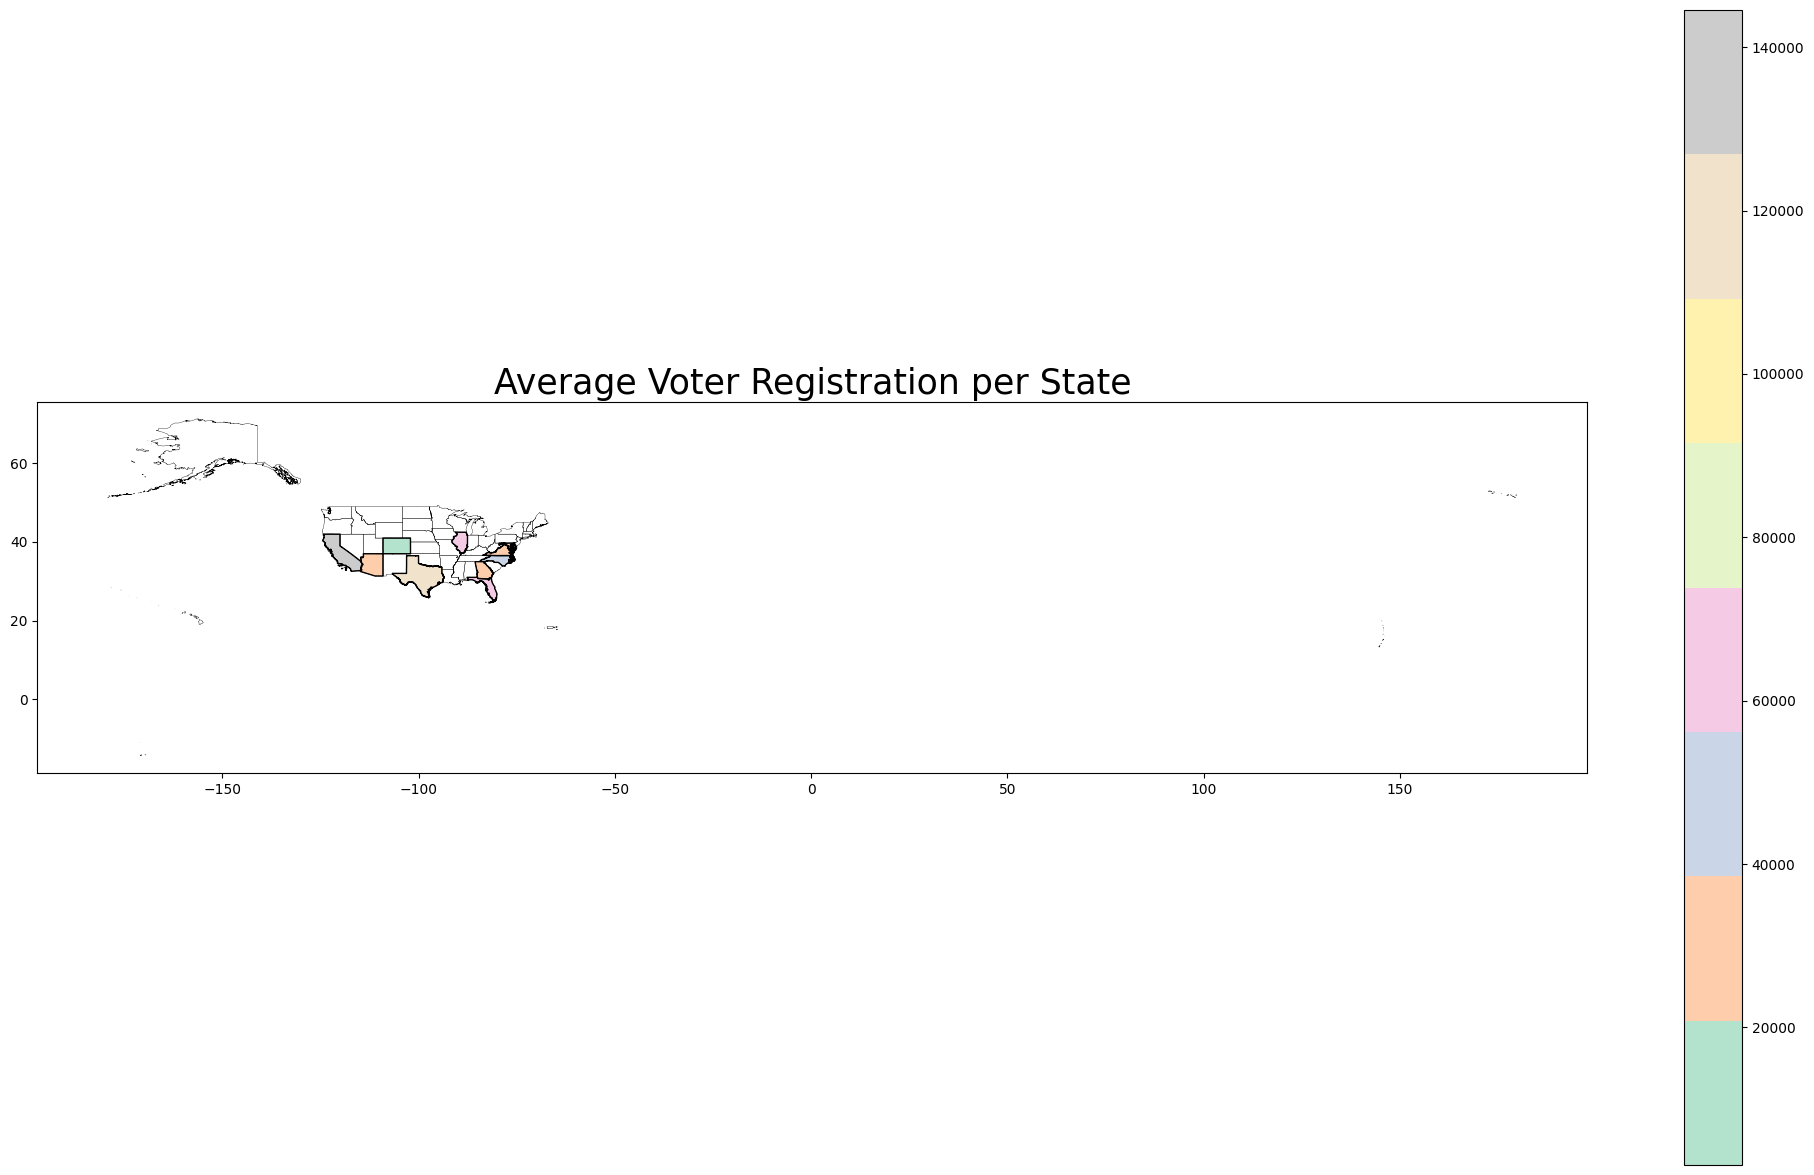

In [25]:
fig=plt.figure(1,figsize=(25,15))
ax=fig.add_subplot()
states.boundary.plot(ax=ax, linewidth=0.25, color="black")
merged_data.plot("avg_registered_voters", cmap="Pastel2", legend=True, ax=ax, edgecolor="black")
plt.title("Average Voter Registration per State", fontsize=25)
plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentences.


In [ ]:
#The data reveals significant spikes in voter registration during 2016 and 2020, both Presidential Election years. This pattern suggests that major political events play a key role in motivating citizens to register. The correlation between election years and registration surges highlights the impact of heightened media coverage, campaign efforts, and voter mobilization strategies during these periods.
#Since voter registration spikes align with Presidential Elections, future outreach campaigns should focus on these periods. By increasing advertising, hosting registration drives, and enhancing social media presence during election seasons, organizations can maximize voter turnout. Additionally, collaborating with influential community leaders and platforms can further boost engagement.
#To gain deeper insights, analyzing voter demographics such as age, ethnicity, and region would help identify underrepresented communities. Understanding which groups show lower registration rates can inform targeted outreach efforts. This approach would ensure voter engagement campaigns are inclusive and effectively address gaps in registration.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

In [ ]:
#

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [ ]:
#Kaitlyn Zheng